<a href="https://colab.research.google.com/github/technologyhamed/Persian-Speech-Recognition/blob/main/Persian_Audio_I_O_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

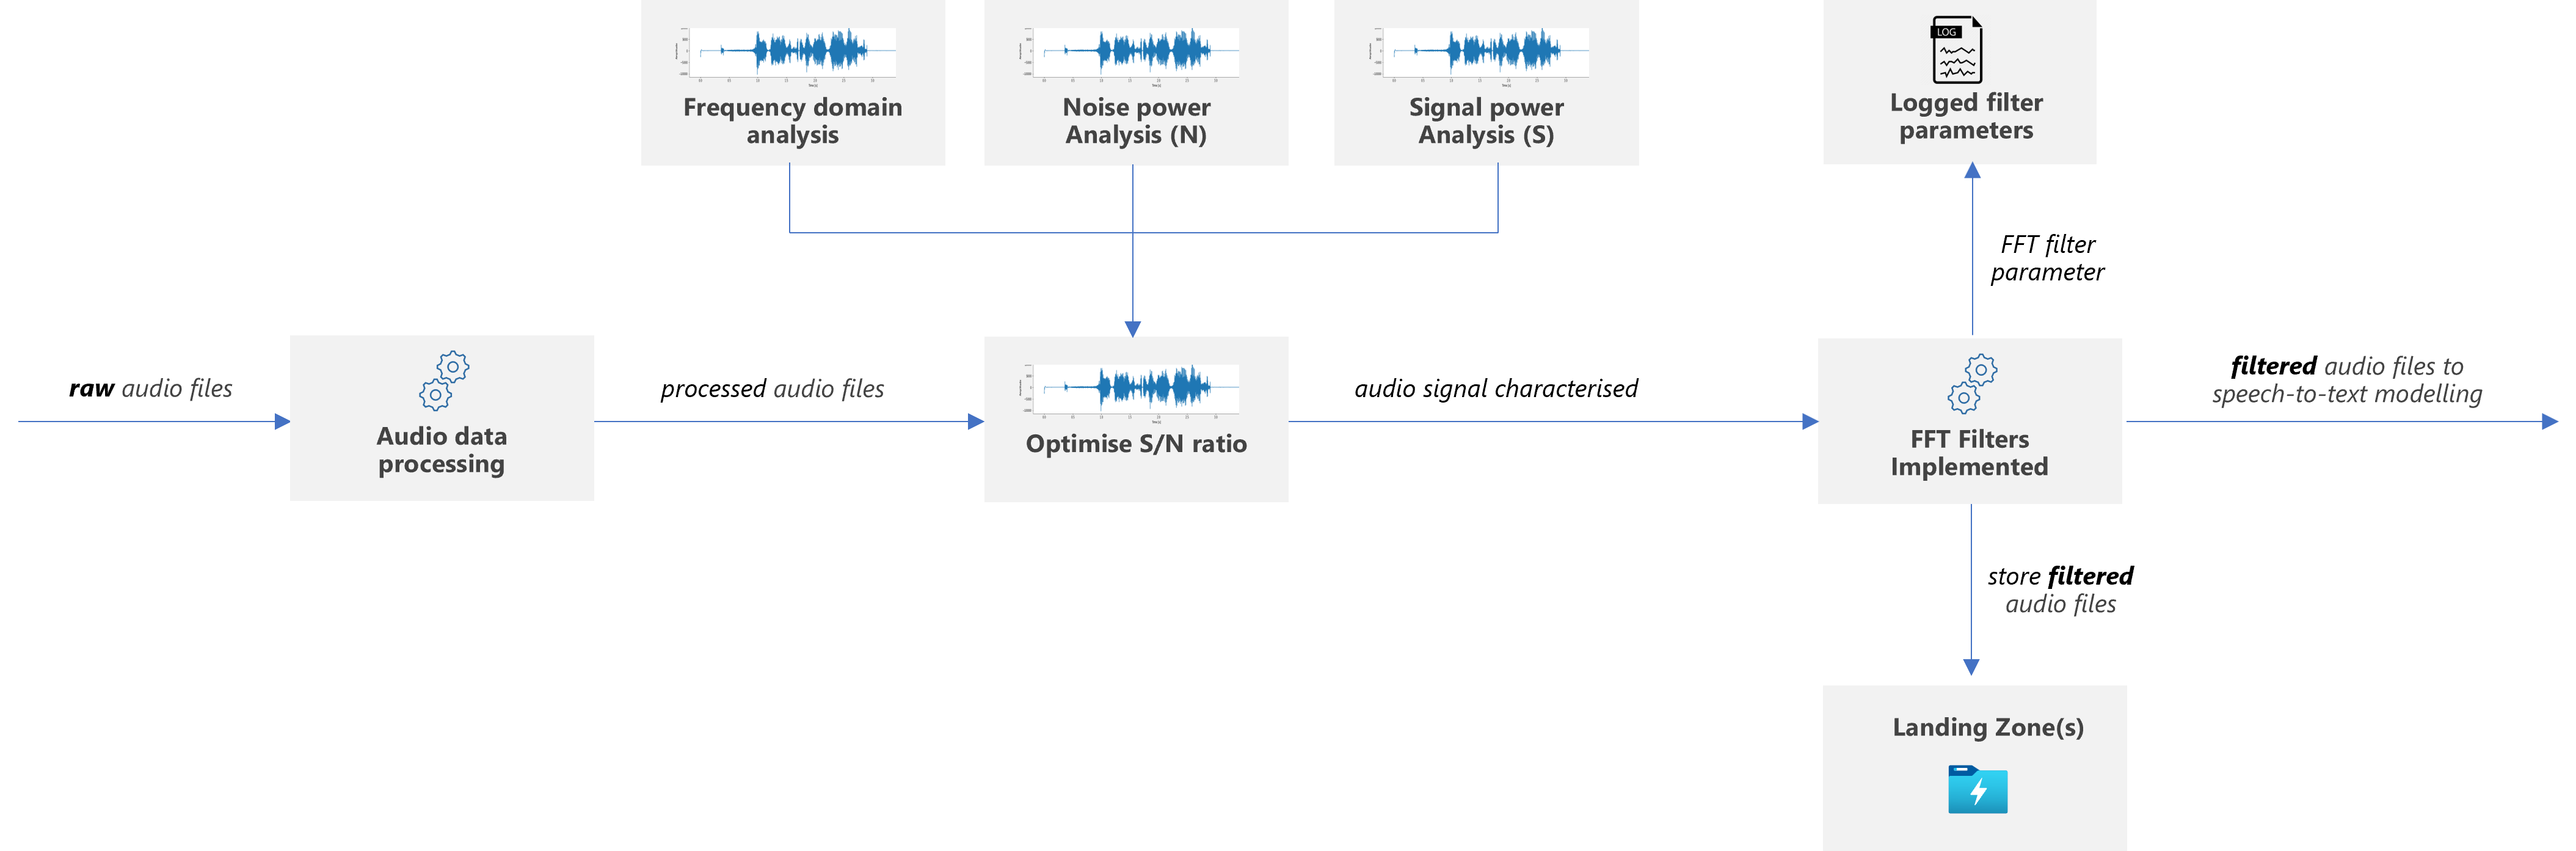

Explanation:

Frequency Domain Analysis: Converts the audio signal from time domain to frequency domain using the Fast Fourier Transform (FFT).
Power Analysis: Computes the power of the signal and noise, which are necessary for the SNR calculation.
SNR Optimization: Optimizes the signal-to-noise ratio using the calculated signal and noise power.
FFT Filters Implementation: Applies an FFT-based filter to the audio signal and returns the filtered signal.
Logging Parameters: Logs the filter parameters used during processing.

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np

class AudioProcessingPipeline:
    def __init__(self):
        self.log = {}

    def frequency_domain_analysis(self, signal):
        # Apply Fourier Transform
        freq_domain_signal = torch.fft.fft(signal)
        return freq_domain_signal

    def power_analysis(self, signal):
        # Compute power of the signal
        power = torch.abs(signal) ** 2
        return power

    def optimize_snr(self, signal_power, noise_power):
        # SNR = signal_power / noise_power
        snr = signal_power / (noise_power + 1e-8)
        return snr

    def fft_filter(self, signal, filter_params):
        # Apply FFT filter to the signal
        fft_signal = torch.fft.fft(signal)
        filtered_signal = fft_signal * filter_params
        return torch.fft.ifft(filtered_signal)

    def process(self, audio_signal):
        # Step 1: Frequency Domain Analysis
        freq_signal = self.frequency_domain_analysis(audio_signal)

        # Step 2: Noise and Signal Power Analysis
        noise_power = self.power_analysis(freq_signal)  # assuming noise power is calculated similarly
        signal_power = self.power_analysis(audio_signal)

        # Step 3: Optimize S/N ratio
        snr_optimized_signal = self.optimize_snr(signal_power, noise_power)

        # Step 4: FFT Filters Implementation
        filter_params = torch.tensor([1.0])  # replace with actual filter parameters
        filtered_signal = self.fft_filter(audio_signal, filter_params)

        # Logging parameters
        self.log['filter_params'] = filter_params
        self.log['snr_optimized'] = snr_optimized_signal

        return filtered_signal

# Example usage:
# Assuming `audio_signal` is a 1-D torch tensor containing audio data

audio_signal = torch.rand(1024)  # Dummy audio signal for demonstration
pipeline = AudioProcessingPipeline()
processed_signal = pipeline.process(audio_signal)

# The processed_signal can now be used for speech-to-text modeling or further processing


Explanation:

Audio Data Processing: The load_audio() function loads the audio file.

Frequency Domain Analysis: The frequency_domain_analysis() function applies FFT (Fast Fourier Transform) to the waveform.

Noise Power Analysis: The noise_power_analysis() function calculates the average power of the noise.

Signal Power Analysis: The signal_power_analysis() function calculates the total power of the signal.

Optimize S/N Ratio: The optimize_sn_ratio() function calculates the signal-to-noise ratio (S/N ratio).

Log Filter Parameters: The log_filter_parameters() function takes the logarithm of the S/N ratio, which could be used as filter parameters.

FFT Filters Implemented: The apply_fft_filters() function applies a filter to the FFT-transformed waveform and then converts it back to the time domain.

Process Multiple Audio Files: The script processes each .wav file in a directory, applies the above steps, and saves the filtered audio in an output directory.

In [ ]:
import torch
import torchaudio
import numpy as np
import os

# Step 1: Audio Data Processing
def load_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

# Step 2: Frequency Domain Analysis
def frequency_domain_analysis(waveform):
    fft = torch.fft.fft(waveform)
    return fft

# Step 3: Noise Power Analysis (N)
def noise_power_analysis(fft):
    noise_power = torch.mean(torch.abs(fft)**2)
    return noise_power

# Step 4: Signal Power Analysis (S)
def signal_power_analysis(fft):
    signal_power = torch.sum(torch.abs(fft)**2)
    return signal_power

# Step 5: Optimize S/N Ratio
def optimize_sn_ratio(signal_power, noise_power):
    sn_ratio = signal_power / noise_power
    return sn_ratio

# Step 6: Log Filter Parameters
def log_filter_parameters(sn_ratio):
    log_sn_ratio = torch.log10(sn_ratio)
    return log_sn_ratio

# Step 7: FFT Filters Implemented
def apply_fft_filters(waveform, filter_params):
    fft = torch.fft.fft(waveform)
    filtered_fft = fft * filter_params
    filtered_waveform = torch.fft.ifft(filtered_fft)
    return filtered_waveform.real

# Function to process a directory of audio files
def process_audio_directory(input_dir, output_dir):
    for filename in os.listdir(input_dir):
        if filename.endswith('.wav'):
            file_path = os.path.join(input_dir, filename)
            waveform, sample_rate = load_audio(file_path)

            # Perform the analysis
            fft = frequency_domain_analysis(waveform)
            noise_power = noise_power_analysis(fft)
            signal_power = signal_power_analysis(fft)
            sn_ratio = optimize_sn_ratio(signal_power, noise_power)
            filter_params = log_filter_parameters(sn_ratio)

            # Apply FFT filters
            filtered_waveform = apply_fft_filters(waveform, filter_params)

            # Save the filtered audio
            output_path = os.path.join(output_dir, filename)
            torchaudio.save(output_path, filtered_waveform, sample_rate)

# Paths to your audio directory
input_directory = "/path/to/input/audio/files"
output_directory = "/path/to/output/audio/files"

# Ensure output directory exists
os.makedirs(output_directory, exist_ok=True)

# Process all audio files in the input directory
process_audio_directory(input_directory, output_directory)


Audio Data Processing:

Load and preprocess the audio files.
Frequency Domain Analysis: Perform a Fast Fourier Transform (FFT) to move the signal into the frequency domain.
Noise and Signal Power Analysis: Calculate the power of the noise and signal.
Optimize S/N Ratio: Implement a filter or method to optimize the Signal-to-Noise (S/N) ratio.
FFT Filters Implementation: Apply FFT filters to the audio files.
Logged Filter Parameters: Store the parameters used for the filter.
Landing Zones: Save the processed audio files.

Explanation:

Loading Audio: The load_audio function loads audio data.
FFT and Power Analysis: The frequency_domain_analysis performs the FFT, and we calculate the noise and signal power.
S/N Ratio Optimization: The optimize_sn_ratio function adjusts the waveform based on the calculated S/N ratio.
FFT Filtering: The fft_filter applies a simple bandpass filter in the frequency domain.
Logging and Saving: The filter parameters are logged, and the processed audio is saved to a file.
Notes:
The script assumes you have specific ranges for noise and signal in the FFT domain; these should be tailored based on your data.
The FFT filter implementation is simplified; depending on your needs, you might want to implement more sophisticated filters.

In [ ]:
import torch
import torchaudio
import numpy as np

# Load audio files
def load_audio(file_path):
    waveform, sample_rate = torchaudio.load(file_path)
    return waveform, sample_rate

# Frequency domain analysis using FFT
def frequency_domain_analysis(waveform):
    # Perform FFT on the waveform
    fft = torch.fft.fft(waveform)
    return fft

# Noise power analysis
def noise_power_analysis(fft_signal, noise_start, noise_end):
    # Estimate noise power from the FFT signal within a specific range
    noise_power = torch.mean(torch.abs(fft_signal[:, noise_start:noise_end])**2)
    return noise_power

# Signal power analysis
def signal_power_analysis(fft_signal, signal_start, signal_end):
    # Estimate signal power from the FFT signal within a specific range
    signal_power = torch.mean(torch.abs(fft_signal[:, signal_start:signal_end])**2)
    return signal_power

# Optimize Signal-to-Noise (S/N) ratio
def optimize_sn_ratio(waveform, noise_power, signal_power):
    # Simple S/N optimization: SNR = Signal Power / Noise Power
    snr = signal_power / noise_power
    optimized_waveform = waveform * snr  # Adjust waveform based on SNR
    return optimized_waveform

# FFT filter implementation
def fft_filter(waveform, low_cutoff, high_cutoff):
    fft_signal = torch.fft.fft(waveform)
    freqs = torch.fft.fftfreq(waveform.size(-1))

    # Apply bandpass filter
    fft_signal[(freqs < low_cutoff) | (freqs > high_cutoff)] = 0
    filtered_waveform = torch.fft.ifft(fft_signal)
    return filtered_waveform

# Save logged filter parameters
def log_filter_parameters(low_cutoff, high_cutoff, log_file):
    with open(log_file, 'w') as file:
        file.write(f"Low Cutoff: {low_cutoff}\n")
        file.write(f"High Cutoff: {high_cutoff}\n")

# Landing zone: save processed audio
def save_audio(waveform, sample_rate, save_path):
    torchaudio.save(save_path, waveform, sample_rate)

# Main processing pipeline
def process_audio_pipeline(file_path, noise_start, noise_end, signal_start, signal_end, low_cutoff, high_cutoff, log_file, save_path):
    # Load and process audio
    waveform, sample_rate = load_audio(file_path)
    fft_signal = frequency_domain_analysis(waveform)

    # Analyze noise and signal power
    noise_power = noise_power_analysis(fft_signal, noise_start, noise_end)
    signal_power = signal_power_analysis(fft_signal, signal_start, signal_end)

    # Optimize S/N ratio
    optimized_waveform = optimize_sn_ratio(waveform, noise_power, signal_power)

    # Apply FFT filters
    filtered_waveform = fft_filter(optimized_waveform, low_cutoff, high_cutoff)

    # Log filter parameters
    log_filter_parameters(low_cutoff, high_cutoff, log_file)

    # Save the final processed audio
    save_audio(filtered_waveform, sample_rate, save_path)

# Example usage
file_path = "path_to_audio_file.wav"
log_file = "filter_parameters.log"
save_path = "processed_audio.wav"

# Define parameters
noise_start, noise_end = 0, 100  # example values
signal_start, signal_end = 100, 200  # example values
low_cutoff, high_cutoff = 0.01, 0.1  # example values

process_audio_pipeline(file_path, noise_start, noise_end, signal_start, signal_end, low_cutoff, high_cutoff, log_file, save_path)
